In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [3]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [6]:
dataFrame.corr()["Type"].sort_values

<bound method Series.sort_values of Type                         1.000000
URL_LENGTH                  -0.228422
NUMBER_SPECIAL_CHARACTERS    0.412095
TCP_CONVERSATION_EXCHANGE    0.744570
DIST_REMOTE_TCP_PORT         0.710294
REMOTE_IPS                   0.126232
APP_BYTES                    0.096659
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_APP_BYTES            -0.086080
REMOTE_APP_BYTES            -0.048806
APP_PACKETS                  0.240818
DNS_QUERY_TIMES             -0.011055
SOURCE_A                     0.536539
SOURCE_B                    -0.128587
SOURCE_C                    -0.075369
SOURCE_D                     0.029479
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_G                    -0.017433
SOURCE_H                     0.055045
SOURCE_I                    -0.138708
SOURCE_J                     0.453197
SOURCE_K                     0.784173
SOURCE_M                     0.734002
SOURCE_L      

<AxesSubplot:xlabel='Type', ylabel='count'>

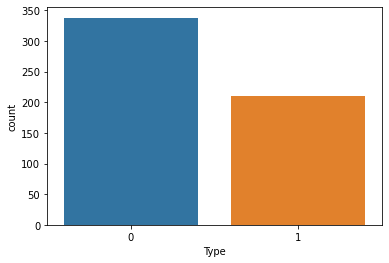

In [7]:
sbn.countplot(x="Type",data=dataFrame)

<AxesSubplot:>

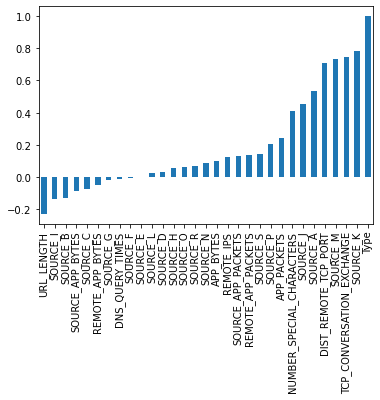

In [8]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

In [9]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis = 1).values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(x_train)

MinMaxScaler()

In [13]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_train.shape

(383, 30)

In [15]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [16]:
model.fit(x=x_train, y=y_train, epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6818 - val_loss: 0.6781
Epoch 2/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6495 - val_loss: 0.6559
Epoch 3/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.6352
Epoch 4/700
12/12 [==============================] - 0s 2ms/step - loss: 0.5717 - val_loss: 0.5986
Epoch 5/700
12/12 [==============================] - 0s 2ms/step - loss: 0.5280 - val_loss: 0.5677
Epoch 6/700
12/12 [==============================] - 0s 2ms/step - loss: 0.4803 - val_loss: 0.5316
Epoch 7/700
12/12 [==============================] - 0s 2ms/step - loss: 0.4308 - val_loss: 0.4922
Epoch 8/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3830 - val_loss: 0.4525
Epoch 9/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3400 - val_loss: 0.4194
Epoch 10/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3009 - val_loss: 0.3900
Epoch 11

12/12 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.2506
Epoch 84/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.2497
Epoch 85/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.2553
Epoch 86/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.2493
Epoch 87/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.2514
Epoch 88/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.2478
Epoch 89/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0492 - val_loss: 0.2395
Epoch 90/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0490 - val_loss: 0.2541
Epoch 91/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.2468
Epoch 92/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0492 - val_loss: 0.2433
Epoch 93/700


12/12 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.1889
Epoch 165/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.1984
Epoch 166/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0331 - val_loss: 0.1995
Epoch 167/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.1940
Epoch 168/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0308 - val_loss: 0.1961
Epoch 169/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0287 - val_loss: 0.1993
Epoch 170/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.2004
Epoch 171/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.1971
Epoch 172/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0330 - val_loss: 0.1891
Epoch 173/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0335 - val_loss: 0.1977
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0123 - val_loss: 0.1920
Epoch 246/700
12/12 [==============================] - ETA: 0s - loss: 0.006 - 0s 2ms/step - loss: 0.0146 - val_loss: 0.1933
Epoch 247/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.2038
Epoch 248/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1971
Epoch 249/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.1890
Epoch 250/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.1875
Epoch 251/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.1900
Epoch 252/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.1919
Epoch 253/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.1886
Epoch 254/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0102

12/12 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.2431
Epoch 327/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.2443
Epoch 328/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.2416
Epoch 329/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.2356
Epoch 330/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.2466
Epoch 331/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.2419
Epoch 332/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.2446
Epoch 333/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.2360
Epoch 334/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.2348
Epoch 335/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.2428
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.2999
Epoch 408/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.2938
Epoch 409/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.3060
Epoch 410/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.2998
Epoch 411/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.3000
Epoch 412/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.2991
Epoch 413/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.3003
Epoch 414/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.3049
Epoch 415/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.2974
Epoch 416/700
12/12 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.3017
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 9.1414e-04 - val_loss: 0.3417
Epoch 487/700
12/12 [==============================] - 0s 2ms/step - loss: 7.2350e-04 - val_loss: 0.3385
Epoch 488/700
12/12 [==============================] - 0s 2ms/step - loss: 6.7267e-04 - val_loss: 0.3400
Epoch 489/700
12/12 [==============================] - 0s 1ms/step - loss: 6.6753e-04 - val_loss: 0.3409
Epoch 490/700
12/12 [==============================] - 0s 2ms/step - loss: 8.0463e-04 - val_loss: 0.3440
Epoch 491/700
12/12 [==============================] - 0s 2ms/step - loss: 7.2864e-04 - val_loss: 0.3420
Epoch 492/700
12/12 [==============================] - 0s 2ms/step - loss: 7.2902e-04 - val_loss: 0.3438
Epoch 493/700
12/12 [==============================] - 0s 1ms/step - loss: 6.7976e-04 - val_loss: 0.3432
Epoch 494/700
12/12 [==============================] - 0s 2ms/step - loss: 6.5913e-04 - val_loss: 0.3481
Epoch 495/700
12/12 [==============================] - 0s 2ms/step - 

12/12 [==============================] - 0s 1ms/step - loss: 3.8256e-04 - val_loss: 0.3794
Epoch 565/700
12/12 [==============================] - 0s 2ms/step - loss: 3.4363e-04 - val_loss: 0.3780
Epoch 566/700
12/12 [==============================] - 0s 2ms/step - loss: 3.7345e-04 - val_loss: 0.3822
Epoch 567/700
12/12 [==============================] - 0s 1ms/step - loss: 4.3560e-04 - val_loss: 0.3784
Epoch 568/700
12/12 [==============================] - 0s 1ms/step - loss: 5.7093e-04 - val_loss: 0.3934
Epoch 569/700
12/12 [==============================] - 0s 2ms/step - loss: 4.1889e-04 - val_loss: 0.3812
Epoch 570/700
12/12 [==============================] - 0s 1ms/step - loss: 5.0766e-04 - val_loss: 0.3927
Epoch 571/700
12/12 [==============================] - 0s 1ms/step - loss: 7.6572e-04 - val_loss: 0.3792
Epoch 572/700
12/12 [==============================] - 0s 2ms/step - loss: 3.2044e-04 - val_loss: 0.3860
Epoch 573/700
12/12 [==============================] - 0s 2ms/step - 

Epoch 642/700
12/12 [==============================] - 0s 2ms/step - loss: 1.7695e-04 - val_loss: 0.4171
Epoch 643/700
12/12 [==============================] - 0s 2ms/step - loss: 1.8396e-04 - val_loss: 0.4144
Epoch 644/700
12/12 [==============================] - 0s 2ms/step - loss: 1.7665e-04 - val_loss: 0.4185
Epoch 645/700
12/12 [==============================] - 0s 2ms/step - loss: 1.8913e-04 - val_loss: 0.4201
Epoch 646/700
12/12 [==============================] - 0s 665us/step - loss: 1.6226e-04 - val_loss: 0.4204
Epoch 647/700
12/12 [==============================] - 0s 2ms/step - loss: 1.8033e-04 - val_loss: 0.4189
Epoch 648/700
12/12 [==============================] - 0s 2ms/step - loss: 1.7372e-04 - val_loss: 0.4214
Epoch 649/700
12/12 [==============================] - 0s 2ms/step - loss: 1.8975e-04 - val_loss: 0.4179
Epoch 650/700
12/12 [==============================] - 0s 2ms/step - loss: 2.6418e-04 - val_loss: 0.4220
Epoch 651/700
12/12 [==============================] 

In [17]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

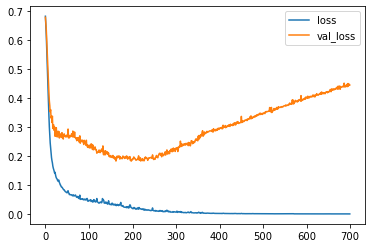

In [18]:
modelKaybi.plot()

In [19]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [20]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [21]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test), verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6933 - val_loss: 0.6869
Epoch 2/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6785 - val_loss: 0.6773
Epoch 3/700
12/12 [==============================] - 0s 1ms/step - loss: 0.6599 - val_loss: 0.6626
Epoch 4/700
12/12 [==============================] - 0s 1ms/step - loss: 0.6372 - val_loss: 0.6432
Epoch 5/700
12/12 [==============================] - 0s 1ms/step - loss: 0.6076 - val_loss: 0.6128
Epoch 6/700
12/12 [==============================] - 0s 1ms/step - loss: 0.5648 - val_loss: 0.5752
Epoch 7/700
12/12 [==============================] - 0s 1ms/step - loss: 0.5175 - val_loss: 0.5307
Epoch 8/700
12/12 [==============================] - 0s 1ms/step - loss: 0.4654 - val_loss: 0.4952
Epoch 9/700
12/12 [==============================] - 0s 1ms/step - loss: 0.4124 - val_loss: 0.4407
Epoch 10/700
12/12 [==============================] - 0s 1ms/step - loss: 0.3624 - val_loss: 0.4083
Epoch 11/

Epoch 83/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0415 - val_loss: 0.1829
Epoch 84/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.1782
Epoch 85/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0416 - val_loss: 0.1766
Epoch 86/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0427 - val_loss: 0.1774
Epoch 87/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0396 - val_loss: 0.1858
Epoch 88/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0404 - val_loss: 0.1784
Epoch 89/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0389 - val_loss: 0.1802
Epoch 90/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0385 - val_loss: 0.1868
Epoch 91/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0412 - val_loss: 0.1812
Epoch 92/700
12/12 [==============================] - 0s 1ms/step - loss: 0.0383 - val_loss: 0.2010


In [22]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

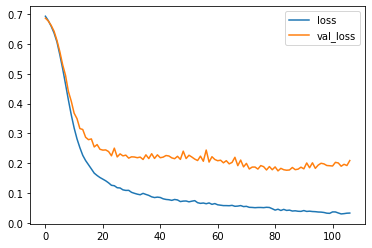

In [23]:
modelKaybi.plot()

In [24]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [25]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test), verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 0s 8ms/step - loss: 0.7120 - val_loss: 0.6919
Epoch 2/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6976 - val_loss: 0.6901
Epoch 3/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6947 - val_loss: 0.6877
Epoch 4/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6878 - val_loss: 0.6851
Epoch 5/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6763 - val_loss: 0.6820
Epoch 6/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6836 - val_loss: 0.6793
Epoch 7/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6648 - val_loss: 0.6765
Epoch 8/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6638 - val_loss: 0.6737
Epoch 9/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6643 - val_loss: 0.6711
Epoch 10/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6567 - val_loss: 0.6683
Epoch 11/

Epoch 83/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2792 - val_loss: 0.2768
Epoch 84/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2991 - val_loss: 0.2842
Epoch 85/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2449 - val_loss: 0.2869
Epoch 86/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3066 - val_loss: 0.2980
Epoch 87/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2588 - val_loss: 0.2904
Epoch 88/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2579 - val_loss: 0.2782
Epoch 89/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2286 - val_loss: 0.2718
Epoch 90/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2979 - val_loss: 0.2812
Epoch 91/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2491 - val_loss: 0.2761
Epoch 92/700
12/12 [==============================] - 0s 2ms/step - loss: 0.2548 - val_loss: 0.2670


In [26]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

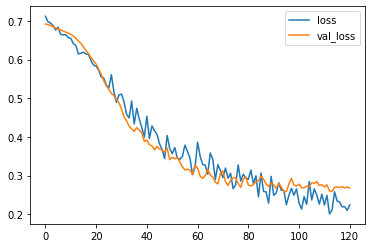

In [27]:
modelKaybi.plot()

In [35]:
tahminlerimiz = model.predict_classes(x_test)

In [36]:
tahminlerimiz

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test,tahminlerimiz))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        91
           1       0.90      0.85      0.88        74

    accuracy                           0.89       165
   macro avg       0.89      0.89      0.89       165
weighted avg       0.89      0.89      0.89       165



In [39]:
print(confusion_matrix(y_test,tahminlerimiz))

[[84  7]
 [11 63]]
